<a href="https://colab.research.google.com/github/vishwaram47/KANs/blob/main/Heart_disease_KAN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install git+https://github.com/KindXiaoming/pykan.git

  Cloning https://github.com/KindXiaoming/pykan.git to /tmp/pip-req-build-s1mo758s
  Running command git clone --filter=blob:none --quiet https://github.com/KindXiaoming/pykan.git /tmp/pip-req-build-s1mo758s
  Resolved https://github.com/KindXiaoming/pykan.git to commit f6ac7e25ed4cd99aba2b9c883d1cf25f959f6ac4
  Preparing metadata (setup.py) ... done
  Created wheel for pykan: filename=pykan-0.0.5-py3-none-any.whl size=44470 sha256=7e1f48d54aa128055c0ab65ab3aa0853dd030d9b821bcc3a185d8e50fd7a5fa3
  Stored in directory: /tmp/pip-ephem-wheel-cache-nm3h21qo/wheels/47/ca/5a/98124e020f3119f51c17f78738c621c140b7aa803b0feda76e
Successfully built pykan


In [1]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [35]:
import pandas as pd
import numpy as np
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)
file_path = '/content/drive/My Drive/KAN/heart_2.csv'
df = pd.read_csv(file_path)
#df = pd.read_csv("heart_2.csv", on_bad_lines='skip')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/KAN/heart_2.csv'

In [3]:
df.describe(include='all')

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [6]:
df = df.drop(columns = 'Race')

df['Sex'] = df['Sex'].replace({'Female':0,'Male':1})

df['AgeCategory'] = df['AgeCategory'].replace({
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80 or older': 12
    })

df['Diabetic'] = df['Diabetic'].replace({'No':0,
                                         'No, borderline diabetes':0,
                                         'Yes':1,
                                         'Yes (during pregnancy)':1})

df['GenHealth'] = df['GenHealth'].replace('Poor',0)
df['GenHealth'] = df['GenHealth'].replace('Fair',1)
df['GenHealth'] = df['GenHealth'].replace('Good',2)
df['GenHealth'] = df['GenHealth'].replace('Very good',3)
df['GenHealth'] = df['GenHealth'].replace('Excellent',4)

df = df.replace('No',0)
df = df.replace('Yes',1)

df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,1,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,0,1,3,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,1,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,0,1,3,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,0,0,2,12.0,0,0,0


In [7]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [8]:
df['HeartDisease'].value_counts()

HeartDisease
0    292422
1     27373
Name: count, dtype: int64

In [9]:
df1 = df.copy()
X = df1.drop(['HeartDisease'],axis=1)
y = df1['HeartDisease']

In [10]:
from sklearn.preprocessing import StandardScaler
import pandas as pd # Import pandas

# Assuming 'X' is your feature matrix from the previous step
scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)

# Convert the NumPy array back to a Pandas DataFrame
X_transformed_df = pd.DataFrame(X_transformed, columns=X.columns)

X_transformed_df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,7.247738e-16,1.000002,-2.565319,-0.675793,-0.155032,0.486872,10.466277
Smoking,319795.0,3.581654e-17,1.000002,-0.837890,-0.837890,-0.837890,1.193474,1.193474
AlcoholDrinking,319795.0,6.023488e-17,1.000002,-0.270320,-0.270320,-0.270320,-0.270320,3.699323
Stroke,319795.0,-1.905253e-17,1.000002,-0.198040,-0.198040,-0.198040,-0.198040,5.049478
PhysicalHealth,319795.0,5.814632e-17,1.000002,-0.424070,-0.424070,-0.424070,-0.172524,3.349118
MentalHealth,319795.0,-4.332645e-17,1.000002,-0.490039,-0.490039,-0.490039,-0.112928,3.281069
DiffWalking,319795.0,-4.122679e-17,1.000002,-0.401578,-0.401578,-0.401578,-0.401578,2.490174
Sex,319795.0,1.328678e-17,1.000002,-0.951711,-0.951711,-0.951711,1.050739,1.050739
AgeCategory,319795.0,5.181400e-17,1.000002,-1.827486,-0.705388,0.136184,0.697233,1.538806
Diabetic,319795.0,1.113157e-17,1.000002,-0.396054,-0.396054,-0.396054,-0.396054,2.524911


###MLP

In [11]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, ELU
from tensorflow.keras.layers import Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [32]:
# Build a neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1]))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(32))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(16))
model.add(LeakyReLU(alpha=0.3))
model.add(Dropout(0.2))  # Dropout layer for regularization
model.add(Dense(8))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model

# Define early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=200, batch_size=100, validation_split=0.25, callbacks=[early_stop])

Epoch 1/200
1919/1919 [==============================] - 14s 5ms/step - loss: 0.2376 - accuracy: 0.9144 - val_loss: 0.2270 - val_accuracy: 0.9161
Epoch 2/200
1919/1919 [==============================] - 8s 4ms/step - loss: 0.2274 - accuracy: 0.9161 - val_loss: 0.2276 - val_accuracy: 0.9159
Epoch 3/200
1919/1919 [==============================] - 10s 5ms/step - loss: 0.2260 - accuracy: 0.9162 - val_loss: 0.2265 - val_accuracy: 0.9159
Epoch 4/200
1919/1919 [==============================] - 10s 5ms/step - loss: 0.2255 - accuracy: 0.9165 - val_loss: 0.2264 - val_accuracy: 0.9155
Epoch 5/200
1919/1919 [==============================] - 10s 5ms/step - loss: 0.2255 - accuracy: 0.9163 - val_loss: 0.2278 - val_accuracy: 0.9154
Epoch 6/200
1919/1919 [==============================] - 9s 5ms/step - loss: 0.2250 - accuracy: 0.9164 - val_loss: 0.2260 - val_accuracy: 0.9161
Epoch 7/200
1919/1919 [==============================] - 10s 5ms/step - loss: 0.2248 - accuracy: 0.9163 - val_loss: 0.2261 - v

In [33]:
# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

1999/1999 [==============================] - 3s 2ms/step
              precision    recall  f1-score   support

           0       0.92      1.00      0.95     58367
           1       0.58      0.06      0.10      5592

    accuracy                           0.91     63959
   macro avg       0.75      0.53      0.53     63959
weighted avg       0.89      0.91      0.88     63959

[[58146   221]
 [ 5283   309]]


###KANs to the action!!

In [12]:
from kan import *
import torch
import math
from torch.utils.data import Dataset, DataLoader

In [13]:
X_tensor = torch.tensor(X_transformed_df.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values.reshape(-1, 1), dtype=torch.float32)  # Reshape y to be 2D (n_samples, 1)


In [14]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)


In [15]:
# Define a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        sample = {'input': self.X[idx], 'label': self.y[idx]}
        return sample

# Create instances of the custom dataset for train and test sets
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

# Structure the dataset dictionary
dataset = {
    'train_input': train_dataset.X,
    'test_input': test_dataset.X,
    'train_label': train_dataset.y,
    'test_label': test_dataset.y
}

In [16]:
# Example of printing the structured dataset
print("Dataset:")
print("Train input shape:", dataset['train_input'].shape)
print("Train label shape:", dataset['train_label'].shape)
print("Test input shape:", dataset['test_input'].shape)
print("Test label shape:", dataset['test_label'].shape)

Dataset:
Train input shape: torch.Size([255836, 16])
Train label shape: torch.Size([255836, 1])
Test input shape: torch.Size([63959, 16])
Test label shape: torch.Size([63959, 1])


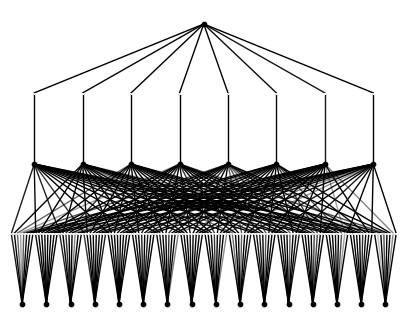

In [17]:
# create a KAN: 16D inputs, 1D output, and 6 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[16,8,1], grid=5, k=3, seed=0)

# plot KAN at initialization
model(dataset['train_input']);
model.plot(beta=100)

In [18]:
# train the model
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.)

train loss: 2.79e-01 | test loss: 2.82e-01 | reg: 6.41e+01 : 100%|█| 20/20 [51:23<00:00, 154.18s/it]


{'train_loss': [array(0.30552992, dtype=float32),
  array(0.30492434, dtype=float32),
  array(0.29873616, dtype=float32),
  array(0.3021433, dtype=float32),
  array(0.30737147, dtype=float32),
  array(0.30163845, dtype=float32),
  array(0.2854009, dtype=float32),
  array(0.28128445, dtype=float32),
  array(0.27954543, dtype=float32),
  array(0.27853665, dtype=float32),
  array(0.2789443, dtype=float32),
  array(0.27930704, dtype=float32),
  array(0.27929586, dtype=float32),
  array(0.27929318, dtype=float32),
  array(0.2792726, dtype=float32),
  array(0.27933007, dtype=float32),
  array(0.27931598, dtype=float32),
  array(0.27930814, dtype=float32),
  array(0.27930596, dtype=float32),
  array(0.2792999, dtype=float32)],
 'test_loss': [array(0.30859873, dtype=float32),
  array(0.30813184, dtype=float32),
  array(0.30132234, dtype=float32),
  array(0.30388826, dtype=float32),
  array(0.30864257, dtype=float32),
  array(0.303201, dtype=float32),
  array(0.28747508, dtype=float32),
  array

Plot trained KAN

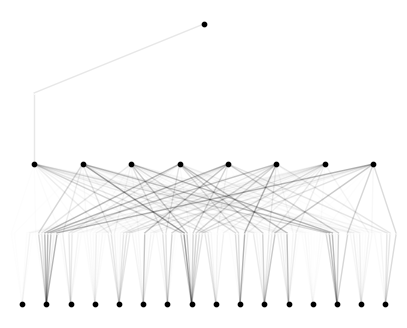

In [20]:
model.plot()

Prune KAN and replot (keep the original shape)

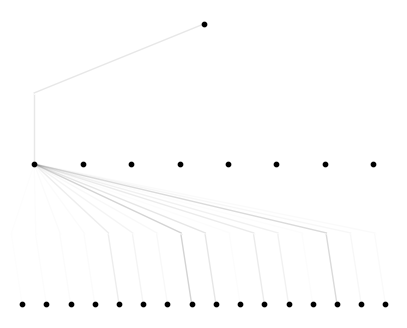

In [21]:
model.prune()
model.plot(mask=True)

Prune KAN and replot (get a smaller shape)

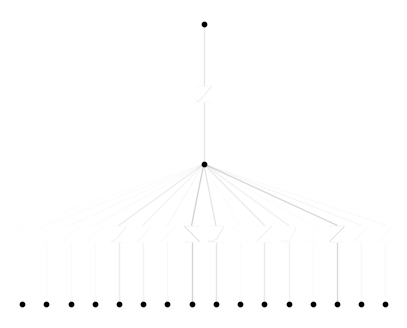

In [22]:
model = model.prune()
model(dataset['train_input'])
model.plot()

Continue training and replot

In [ ]:
model.train(dataset, opt="LBFGS", steps=50);

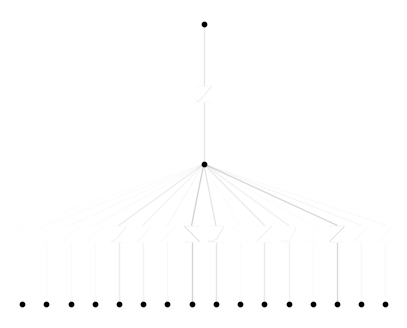

In [23]:
model.plot()

Automatically or manually set activation functions to be symbolic

In [25]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

skipping (0,0,0) since already symbolic
skipping (0,1,0) since already symbolic
skipping (0,2,0) since already symbolic
skipping (0,3,0) since already symbolic
skipping (0,4,0) since already symbolic
skipping (0,5,0) since already symbolic
skipping (0,6,0) since already symbolic
skipping (0,7,0) since already symbolic
skipping (0,8,0) since already symbolic
skipping (0,9,0) since already symbolic
skipping (0,10,0) since already symbolic
skipping (0,11,0) since already symbolic
skipping (0,12,0) since already symbolic
skipping (0,13,0) since already symbolic
skipping (0,14,0) since already symbolic
skipping (0,15,0) since already symbolic
skipping (1,0,0) since already symbolic


Continue training to almost machine precision

In [ ]:
model.train(dataset, opt="LBFGS", steps=50);

Obtain the symbolic formula

In [26]:
model.symbolic_formula()[0][0]

0.87 - 1.15*tanh(0.02*(1 - 0.56*x_3)**3 - 0.06*sin(0.33*x_1 + 1.99) + 0.26*sin(8.77*x_13 + 1.77) + 0.18*sin(7.6*x_14 - 9.0) + 0.15*sin(0.54*x_5 - 4.36) + 0.18*sin(6.44*x_7 - 9.53) - 1.53*sin(0.14*x_9 - 7.69) - 0.03*tanh(2.0*x_12 - 1.14) - 0.09*tanh(0.61*x_6 - 1.31) - 1.21)

In [27]:
def custom_function(x):
    result = 0.87 - 1.15 * torch.tanh(0.02 * (1 - 0.56 * x[2]) ** 3 -
                                       0.06 * torch.sin(0.33 * x[0] + 1.99) +
                                       0.26 * torch.sin(8.77 * x[12] + 1.77) +
                                       0.18 * torch.sin(7.6 * x[13] - 9.0) +
                                       0.15 * torch.sin(0.54 * x[4] - 4.36) +
                                       0.18 * torch.sin(6.44 * x[6] - 9.53) -
                                       1.53 * torch.sin(0.14 * x[8] - 7.69) -
                                       0.03 * torch.tanh(2.0 * x[11] - 1.14) -
                                       0.09 * torch.tanh(0.61 * x[5] - 1.31) -
                                       1.21)
    return result

In [28]:
y_test.shape



torch.Size([63959, 1])

In [30]:
# Convert X_test to numpy array
X_test_np = X_test.numpy()

# Compute predictions for each row in X_test
y_pred_list = []
for i in range(X_test_np.shape[0]):
    x = X_test_np[i]
    y_pred = custom_function(torch.tensor(x, dtype=torch.float32))
    y_pred_list.append(y_pred)  # Assuming you want a list of scalar values

# Convert y_pred_list to torch tensor
y_pred_tensor = torch.tensor(y_pred_list, dtype=torch.float32).unsqueeze(1)
y_pred_binary = (y_pred_tensor >= 0.5).float()
# Print y_pred_tensor shape (should be (184,))
print("y_pred shape:", y_pred_tensor.shape)

y_pred shape: torch.Size([63959, 1])


In [31]:
# Flatten tensors to 1D arrays (if necessary)
y_pred_flat = y_pred_binary.flatten().numpy()  # Flatten to 1D numpy array
y_test_flat = y_test.flatten().numpy()  # Flatten to 1D numpy array

# Generate classification report
report = classification_report(y_test_flat, y_pred_flat)

print("Classification Report:")
print(report)

cm = confusion_matrix(y_test_flat, y_pred_flat)

print("\nConfusion Matrix:")
print(cm)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     58367
         1.0       0.33      0.02      0.04      5592

    accuracy                           0.91     63959
   macro avg       0.62      0.51      0.49     63959
weighted avg       0.86      0.91      0.87     63959


Confusion Matrix:
[[58141   226]
 [ 5483   109]]
